In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,rob,27,70000
1,michael,29,90000
2,mohan,29,61000
3,ismail,28,60000
4,kory,42,150000


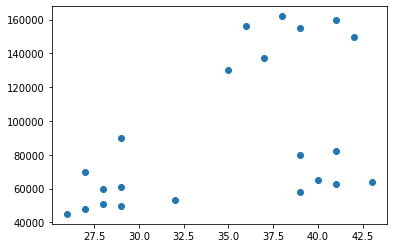

In [4]:
plt.scatter(df['Age'],df['Income($)'])

In [5]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [6]:
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

C:\Users\power\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [7]:
df['cluster']=y_predicted
df

,Name,Age,Income($),cluster
0,rob,27,70000,0
1,michael,29,90000,0
2,mohan,29,61000,2
3,ismail,28,60000,2
4,kory,42,150000,1
5,gautam,39,155000,1
6,david,41,160000,1
7,andrea,38,162000,1
8,brad,36,156000,1
9,angelina,35,130000,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


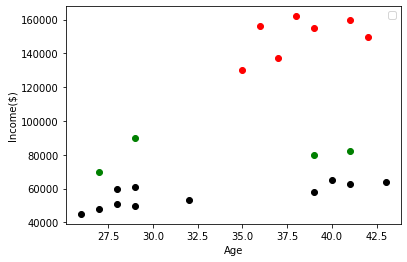

In [8]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

plt.scatter(df1['Age'],df1['Income($)'],color='green')
plt.scatter(df2['Age'],df2['Income($)'],color='red')
plt.scatter(df3['Age'],df3['Income($)'],color='black')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [9]:
scaler=MinMaxScaler()

In [15]:
df['Income($)']=scaler.fit_transform(df[['Income($)']])
df['Age']=scaler.fit_transform(df[['Age']])

In [16]:
df.head()

,Name,Age,Income($),cluster
0,rob,0.058824,0.213675,0
1,michael,0.176471,0.384615,0
2,mohan,0.176471,0.136752,2
3,ismail,0.117647,0.128205,2
4,kory,0.941176,0.897436,1


In [21]:
km2=KMeans(n_clusters=3)
km2

KMeans(n_clusters=3)

In [22]:
y_pred=km2.fit_predict(df[['Age','Income($)']])

C:\Users\power\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [23]:
y_pred

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [24]:
df['cluster2']=y_pred

In [25]:
df1=df[df.cluster2==0]
df2=df[df.cluster2==1]
df3=df[df.cluster2==2]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


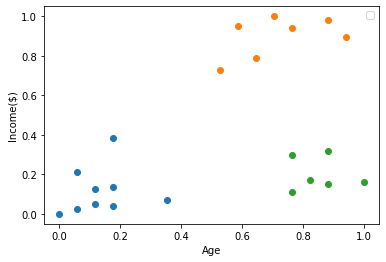

In [27]:
plt.scatter(df1['Age'],df1['Income($)'])
plt.scatter(df2.Age,df2['Income($)'])
plt.scatter(df3.Age,df3['Income($)'])

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [28]:
k_rng=range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

C:\Users\power\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\power\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\power\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\power\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

In [29]:
sse

[5.434011511988176,
 2.091136388699076,
 0.4750783498553094,
 0.34910470944195643,
 0.2621792762345213,
 0.22476961228772663,
 0.1685851223602976,
 0.13265419827245162,
 0.10497488680620906]

Text(0, 0.5, 'sse')

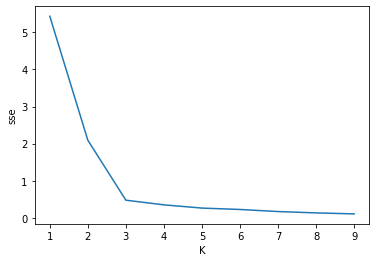

In [31]:
plt.plot(range(1,10),sse)
plt.xlabel('K')
plt.ylabel('sse')